In [83]:
import pandas as pd
import matplotlib as plt
from itertools import cycle, islice

In [47]:
filename = "/Users/danielgilberg/data_science/metis/project_benson/15zpallagi.csv"
df = pd.read_csv(filename)
zip_df = pd.read_csv("/Users/danielgilberg/data_science/metis/project_benson/zipcodes.csv")

mask = ((df.STATE=="NY" ))
df = df[mask]
neighborhood_df = pd.merge(df, zip_df, on="zipcode")
a = neighborhood_df[["zipcode", "agi_stub", "N1", "neighborhood"]]
a

,zipcode,agi_stub,N1,neighborhood
0,10001,1,3760.0,Chelsea and Clinton
1,10001,2,2430.0,Chelsea and Clinton
2,10001,3,1930.0,Chelsea and Clinton
3,10001,4,1340.0,Chelsea and Clinton
4,10001,5,2480.0,Chelsea and Clinton
5,10001,6,2370.0,Chelsea and Clinton
6,10002,1,22380.0,Lower East Side
7,10002,2,8260.0,Lower East Side
8,10002,3,4690.0,Lower East Side
9,10002,4,2690.0,Lower East Side


In [48]:
a["avg_income_score"] = (a["N1"] * a["agi_stub"])/100
a = a.groupby(["zipcode", "neighborhood"], as_index=False)["avg_income_score"].mean()

a = a.sort_values(by="avg_income_score", ascending=False).reset_index()

b = a.head(75)
b

/Users/danielgilberg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,index,zipcode,neighborhood,avg_income_score
0,21,10025,Upper West Side,246.316667
1,19,10023,Upper West Side,223.333333
2,40,10128,Upper East Side,206.100000
3,13,10016,Gramercy Park and Murray Hill,199.966667
4,20,10024,Upper West Side,197.766667
5,9,10011,Chelsea and Clinton,194.716667
6,100,11215,Northwest Brooklyn,192.533333
7,53,10314,Mid-Island,190.966667
8,87,11201,Northwest Brooklyn,188.166667
9,2,10003,Lower East Side,185.566667


In [81]:
# plt.bar(years,
#         values,
#         color='blue',
#         edgecolor='None',
#         width=0.75,
#         align='center')
# plt.xticks(years, [str(year) for year in years]);
top_five = a.head(5)
bottom_five = a.tail(5)
mid_point = len(a)/2
middle_five = a[mid_point-2:mid_point+3]
x = top_five.append(middle_five)
x = x.append(bottom_five)
x

,index,zipcode,neighborhood,avg_income_score
0,21,10025,Upper West Side,246.316667
1,19,10023,Upper West Side,223.333333
2,40,10128,Upper East Side,206.100000
3,13,10016,Gramercy Park and Murray Hill,199.966667
4,20,10024,Upper West Side,197.766667
85,60,10457,Central Bronx,85.000000
86,83,11103,Northwest Queens,84.950000
87,134,11365,Central Queens,84.783333
88,11,10013,Greenwich Village and Soho,84.300000
89,85,11105,Northwest Queens,83.466667


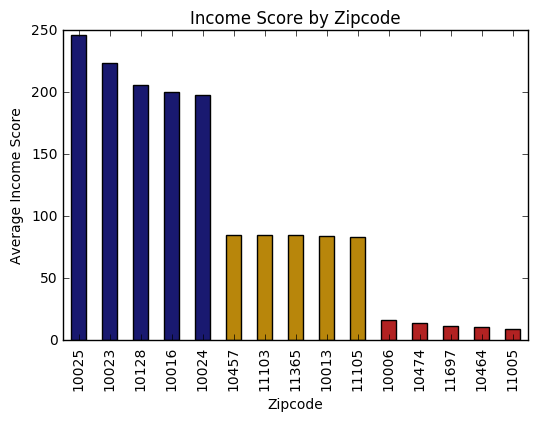

In [101]:
%matplotlib inline
my_colors = ["midnightblue", "midnightblue", "midnightblue", "midnightblue","midnightblue", 
             "darkgoldenrod","darkgoldenrod","darkgoldenrod","darkgoldenrod","darkgoldenrod", 
             "firebrick", "firebrick", "firebrick", "firebrick", "firebrick"]
ax = x.plot(x="zipcode", y="avg_income_score", kind="bar", legend=False, color=my_colors, title="Income Score by Zipcode")
ax.set_ylabel("Average Income Score")
ax.set_xlabel("Zipcode")
